# K NEAREST NEIGGHBORS

# Import my libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlp

# Imprting the dataset

In [4]:
ADVERT= pd.read_csv("C:\\Users\\Dell\\Documents\\Social_Network_Ads.csv")

ADVERT

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [12]:
x = ADVERT.iloc[:, :-1].values
y = ADVERT.iloc[:, -1].values

# SPLITTING MY ADVERT DATA INTO TRAINING AND TEST SET.

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Scaling of features

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Training the K-NN model on the training set

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

# predicting the new result

In [20]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


# predicting the test set results

In [26]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


# creating a prediction dataframe to compare my prediction_y values and y_test values from my data

In [38]:
%%time
pred_df= pd.DataFrame([y_pred, y_test]).T
pred_df.rename(columns= {0: 'y_pred', 1: 'y_test'}, inplace= True)
comments= []
for T, M in zip(pred_df['y_pred'], pred_df['y_test']):
    if int(T)== int(M):
        comments.append('good to go')
    else:
        comments.append('try again later')
pred_df['comments']= comments

pred_df

,y_pred,y_test,comments
0,0,0,good to go
1,0,0,good to go
2,0,0,good to go
3,0,0,good to go
4,0,0,good to go
...,...,...,...
95,0,1,try again later
96,0,0,good to go
97,1,1,good to go
98,1,1,good to go


# Manually calculating our model accuracy for K-NN

In [39]:
model_accuracy= '{:.2%}'.format(len(pred_df[pred_df['comments']== 'good to go'])/len(pred_df))
print('model accuracy:', model_accuracy)

model accuracy: 93.00%


# MAKING A CONFUSION MATRIX

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

# VISUALISING THE TRAINING SET RESULTS

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


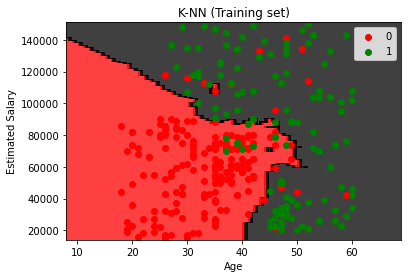

Wall time: 19min 49s


In [40]:
%%time
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(x_train), y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 1),
                     np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 1))
mlp.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'black')))
mlp.xlim(x1.min(), x1.max())
mlp.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    mlp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
mlp.title('K-NN (Training set)')
mlp.xlabel('Age')
mlp.ylabel('Estimated Salary')
mlp.legend()
mlp.show()

# Visualising the test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


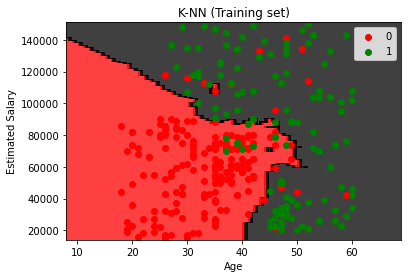

Wall time: 27min 8s


In [41]:
%%time
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(x_train), y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 1),
                     np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 1))
mlp.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'black')))
mlp.xlim(x1.min(), x1.max())
mlp.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    mlp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
mlp.title('K-NN (Training set)')
mlp.xlabel('Age')
mlp.ylabel('Estimated Salary')
mlp.legend()
mlp.show()